<a href="https://colab.research.google.com/github/uplearni/CreditLimitReccomender/blob/main/CreditLimitProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries

#for data manipulation
import pandas as pd;
import numpy as np;
import io
import warnings
warnings.filterwarnings('ignore')

#for data visualisation
import matplotlib.pyplot as plt;
import seaborn as sns;
from matplotlib.cbook import boxplot_stats

#for data modelling
#for splitting data
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#for model preprocessing
from sklearn.preprocessing import PowerTransformer
#for statistical analysis
import statsmodels.api as sm

In [2]:
# importing dataset
url = 'https://raw.githubusercontent.com/uplearni/CreditLimitReccomender/main/Credit_Card_Dataset.csv'
Credit_Data = pd.read_csv(url)

In [11]:
# Data Cleaning

# this dataset contained #NULL! for null values so we are raplacing them witn pandas nan
Credit_Data=Credit_Data.replace(r'^#NULL!$',np.nan,regex=True)

#filtering rows with any missing value
print(Credit_Data.isna().any(axis=1).sum())
#drop rows with missing values
Credit_Data2=Credit_Data.dropna()
#checking
print(Credit_Data2.isna().any(axis=1).sum())


#print(Credit_Data2.columns)
#we dont need unique id , attrition flag or the random numbers so remove them
Credit_Data2=Credit_Data2.drop(columns=["Random_numbers","Attrition_Flag","CLIENTNUM"])
#print(Credit_Data2.columns)

#checking the number of duplicates rows
print("No of duplicate rows= ",Credit_Data2.duplicated().sum())
#what are those duplicated rows
Credit_Data2[Credit_Data2.duplicated()]
#dropping them
Credit_Data2.drop_duplicates(inplace=True)
print("No. of rows after duplicates were dropped= ",Credit_Data2.duplicated().sum())



217
0
No of duplicate rows=  1
No. of rows after duplicates were dropped=  0


In [ ]:
#cleaned data
display(Credit_Data2)
Credit_Data2.shape

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time
0,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no
1,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no
2,34,female,2,primary,single,<30k,blue,24,1438.3,0.000,yes
3,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no
4,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no
...,...,...,...,...,...,...,...,...,...,...,...
7293,41,female,3,third level,married/living with partner,<30k,blue,37,1438.3,0.532,no
7294,50,male,0,primary,married/living with partner,51 – 70k,blue,46,3640.0,0.181,no
7295,38,male,3,third level,single,51 – 70k,blue,34,12050.0,0.151,no
7296,49,female,3,secondary,married/living with partner,<30k,blue,45,2951.0,0.826,no


(7297, 11)

In [ ]:
#EDA
Credit_Data2.info()

#Dataset Columns
Customer_Age=Credit_Data2['Customer_Age']
Gender=Credit_Data2['Gender']
Dependent_count=Credit_Data2['Dependent_count']
Education_Level=Credit_Data2['Education_Level']
Marital_Status=Credit_Data2['Marital_Status']
Income_Category=Credit_Data2['Income_Category']
Card_Category=Credit_Data2['Card_Category']
Months_on_book=Credit_Data2['Months_on_book']
Credit_Limit=Credit_Data2['Credit_Limit']
Avg_Utilization_Ratio=Credit_Data2['Avg_Utilization_Ratio']
Pay_on_time=Credit_Data2['Pay_on_time']

<class 'pandas.core.frame.DataFrame'>
Index: 7297 entries, 0 to 7297
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Age           7297 non-null   int64  
 1   Gender                 7297 non-null   object 
 2   Dependent_count        7297 non-null   int64  
 3   Education_Level        7297 non-null   object 
 4   Marital_Status         7297 non-null   object 
 5   Income_Category        7297 non-null   object 
 6   Card_Category          7297 non-null   object 
 7   Months_on_book         7297 non-null   int64  
 8   Credit_Limit           7297 non-null   float64
 9   Avg_Utilization_Ratio  7297 non-null   float64
 10  Pay_on_time            7297 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 684.1+ KB


Text(0, 0.5, 'Number of Customers')

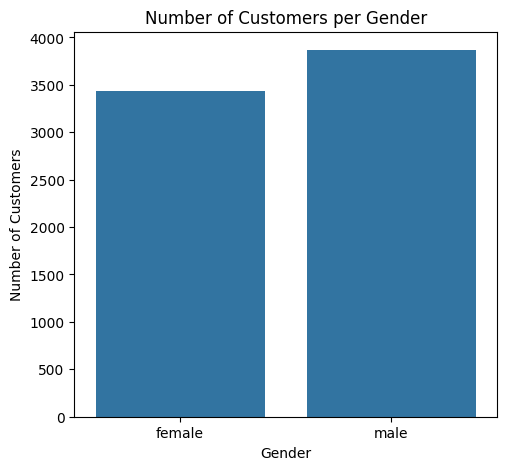

In [ ]:
# 1. Customers per gender
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=Credit_Data2,x=Gender, ax=ax1)
plt.title("Number of Customers per Gender")
plt.ylabel("Number of Customers")
# result:males more than females

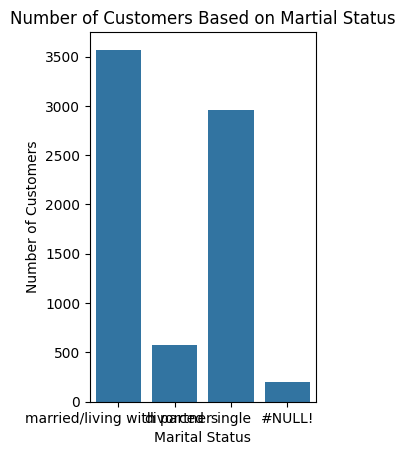

In [ ]:

# 2. number of customers per martial status
ax2 = plt.subplot(1,2,2)
sns.countplot(data=Credit_Data2,x=Marital_Status, ax=ax2)
plt.title("Number of Customers Based on Martial Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()
#result : married and single people are in majority

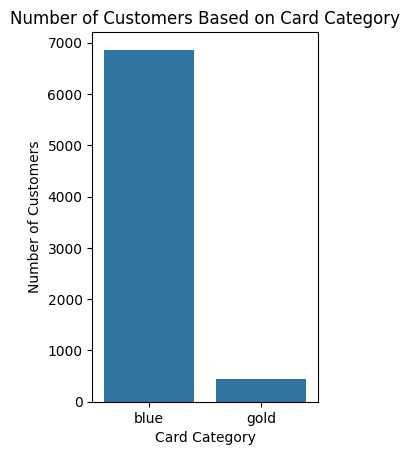

In [ ]:
# 3. Customers based on Card Category
ax3=plt.subplot(1,2,1)
sns.countplot(data=Credit_Data2,x=Card_Category, ax=ax3)
plt.title("Number of Customers Based on Card Category")
plt.xlabel("Card Category")
plt.ylabel("Number of Customers")
plt.show()
#Result : Customers with blue card are far more than the gold one

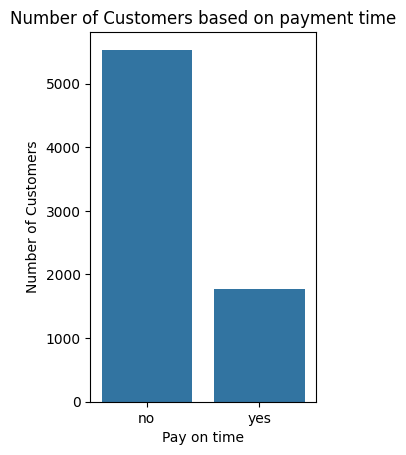

In [ ]:
# 4. Customers who pay on time and ones who dont
ax4=plt.subplot(1,2,2)
sns.countplot(data=Credit_Data2,x=Pay_on_time, ax=ax4)
plt.title("Number of Customers based on payment time")
plt.xlabel("Pay on time")
plt.ylabel("Number of Customers")
plt.show()
# most customers do not pay on time

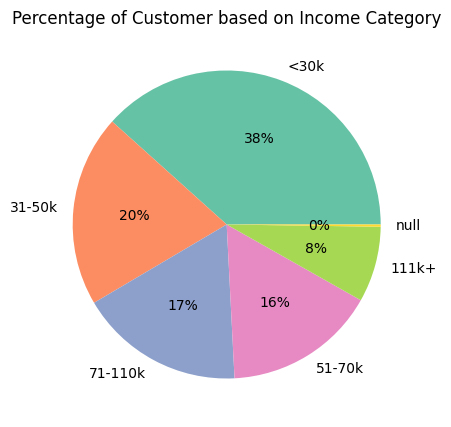

In [ ]:
# 5. Income Category
Credit_Data2["Income_Category"].value_counts()
plt.figure(figsize=(12,5))
Income_data=Credit_Data2["Income_Category"].value_counts(normalize=True)
#print(Income_data)
Income_lables=["<30k","31-50k","71-110k","51-70k","111k+","null"]
plt.pie(Income_data,labels=Income_lables,autopct='%.0f%%',colors=sns.color_palette("Set2"))
plt.title("Percentage of Customer based on Income Category")
plt.show()
# Most People earn less than 30k

count    7297.000000
mean       46.321502
std         7.999964
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: Customer_Age, dtype: float64


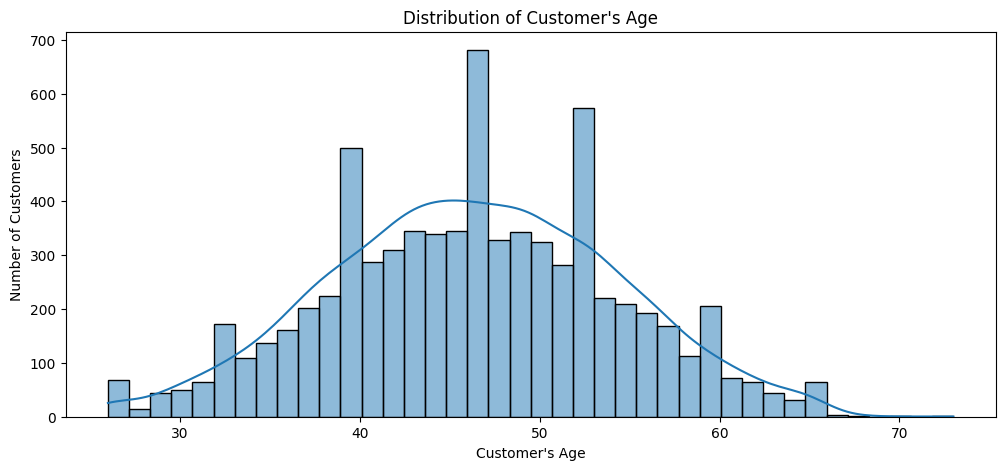

In [ ]:
# 6. Customers per Age
print(Credit_Data2["Customer_Age"].describe())
plt.figure(figsize=(12,5))
sns.histplot(data=Credit_Data2,x="Customer_Age",bins=40,kde=True).set(title="Distribution of Customer's Age",ylabel="Number of Customers",xlabel="Customer's Age")
plt.show()